In [4]:
#donnees tips

#importation des librairies

import matplotlib.pyplot
import pandas
import scipy.stats
import numpy

%matplotlib inline

In [5]:
#lecture du fichier csv tips restaurants.csv(pourboires au restaurant)
tipsrestaurant = pandas.read_csv("tipsrestaurants.csv", 
                       header = 0, sep = ",")

In [6]:
#on est dans un dataframe 
type(tipsrestaurant)

pandas.core.frame.DataFrame

In [7]:
tipsrestaurant.shape
tipsrestaurant.count()
#244 lignes(nombre de pourboires enregistrées) et 7 colonnes

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [8]:
#informations sur les attributs du dataframe étudié
tipsrestaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
#Partie 1:Statistiques descriptives univariés

In [10]:
# résumé basique des attributs
#count, mean, std, min, premier quartile, médiane, troisième quartile, max
tipsrestaurant.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
#à 10 - 2 près
tipsrestaurant.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [12]:
#informations sur l'attribut total_bill(addition) (variable quantitative)
tipsrestaurant["total_bill"].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [13]:
tipsrestaurant.total_bill.quantile([.01, .1, .9, .99])

0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: total_bill, dtype: float64

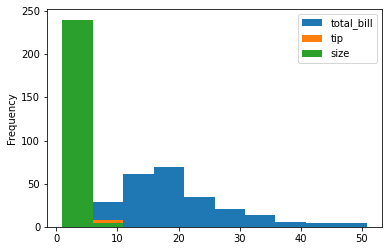

In [14]:
#histogramme représentant la fréquence 
tipsrestaurant.plot.hist()

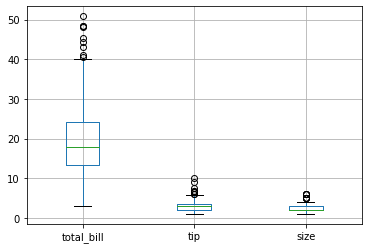

In [15]:
#boite à moustaches pour les 3 attributs total_bill, tip et size avec grille
tipsrestaurant.boxplot()

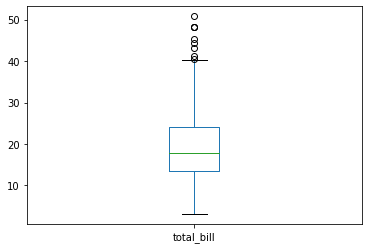

In [16]:
#boite à moustaches pour l'attribut total_bill sans  grille
tipsrestaurant.boxplot(column = "total_bill", grid = False)

In [17]:
#qualitative avec l'attribut sexe
tipsrestaurant.sex.value_counts()

#plus d'hommes que de femmes qui ont payé au restaurant

Male      157
Female     87
Name: sex, dtype: int64

In [18]:
#tableau croisé simple sexe nombre d'hommes et femmes
pandas.crosstab(tipsrestaurant.sex, "freq")

col_0,freq
sex,
Female,87
Male,157


In [19]:
#tableau croisé simple sexe propotions d'hommes/femmes

pandas.crosstab(tipsrestaurant.sex, "freq", normalize=True)

col_0,freq
sex,
Female,0.356557
Male,0.643443


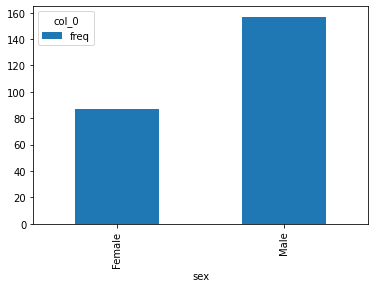

In [20]:
#Représentation Diagramme en barres pour l'attribut sexe nombre
t1 = pandas.crosstab(tipsrestaurant.sex, "freq")
t1.plot.bar()

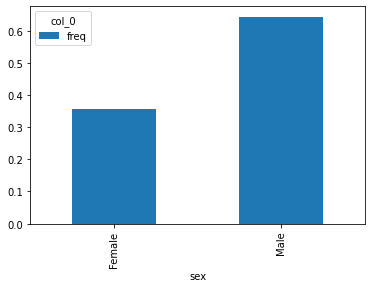

In [21]:
#Représentation Diagramme en barres pour l'attribut sexe propotion hommes/femmes
tnormalize = pandas.crosstab(tipsrestaurant.sex, "freq", normalize=True)
tnormalize.plot(kind = "bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74dfc63780>],
      dtype=object)

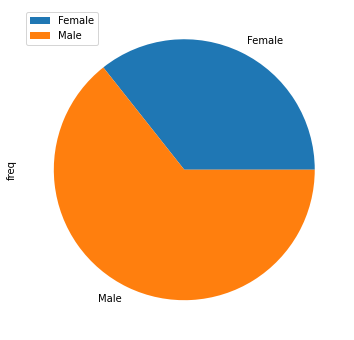

In [22]:
#diagramme circulaire attribut sexe
t3 = pandas.crosstab(tipsrestaurant.sex, "freq")
t3.plot.pie(subplots=True, figsize = (6, 6))

In [25]:
#qualitative avec l'attribut sexe compter
tipsrestaurant.day.value_counts()

#samedi plus de pourboires

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [31]:
pandas.crosstab(tipsrestaurant.day, "freq")


col_0,freq
day,
Fri,19
Sat,87
Sun,76
Thur,62


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74de856dd8>],
      dtype=object)

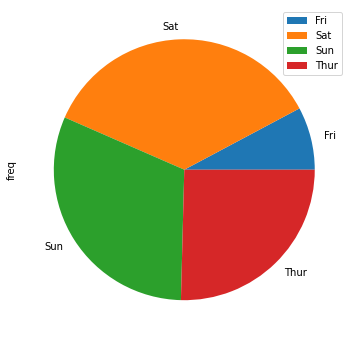

In [32]:
#diagramme circulaire attribut day
t3 = pandas.crosstab(tipsrestaurant.day, "freq")
t3.plot.pie(subplots=True, figsize = (6, 6))

In [26]:
tipsrestaurant.time.value_counts()

#diner plus de pourboire

Dinner    176
Lunch      68
Name: time, dtype: int64

In [24]:
#Partie 2: Statistiques descriptives bivariées

In [33]:
#correlation inter-attributs(force de linéarité entre deux variables)
#quantitative-qualitative
tipsrestaurant.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
print("Valeur du coefficient de corrélation total_bill et tip:")
tipsrestaurant.total_bill.corr(tipsrestaurant.tip)
#linéarité assez forte entre total_bill et tip

Valeur du coefficient de corrélation total_bill et tip:


0.6757341092113641

In [ ]:
tips.total_bill.cov(tips.tip)

In [ ]:
#correlation total_bill et tip(force de corrélation entre deux variables)
print("Valeur de la covariance total_bill et tip:")
tipsrestaurant.total_bill.cov(tipsrestaurant.tip)

Valeur de la covariance total_bill et tip:


8.323501629224854

In [ ]:
#pearson renvoie une tuple avec le coefficient de corrélation de Pearson et la p-value 
#(probabilité sur des données non corrélées d'avoir un coefficient de corrélation au moins aussi bon)
#La valeur p en second argument 
#nous donne la probabilité d'observer ce que nous avons observé, dans la mesure où une hypothèse est vraie
print("Tuple renvoyée, p-value")
scipy.stats.pearsonr(tipsrestaurant.total_bill, tips.tip)

Tuple renvoyée, p-value


(0.6757341092113647, 6.6924706468630016e-34)

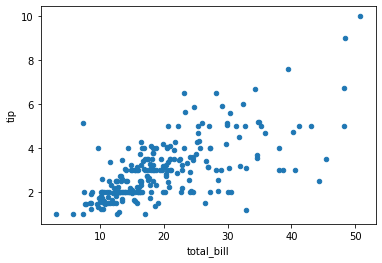

In [ ]:
tipsrestaurant.plot.scatter("total_bill", "tip")

In [ ]:
#qualitative-qualitative

In [ ]:
#tableau croisé simple fumeur-sexe en nombre 
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [ ]:
#tableau croisé simple fumeur-sexe avec les sous-totaux en nombre
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [ ]:
#tableau croisé simple fumeur-sexe avec les sous-totaux mais avec des proportions
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize = True)

smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [ ]:
#tableau croisé simple fumeur-sexe avec les sous-totaux mais avec des proportions mais avec une normalisation en lignes
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize = "index", margins=True)

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166
All,0.618852,0.381148


In [ ]:
#tableau croisé simple fumeur-sexe avec les sous-totaux mais avec des proportions mais avec une normalisation en colonnes
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize = "columns")

smoker,No,Yes
sex,,
Female,0.357616,0.354839
Male,0.642384,0.645161


In [ ]:
#tableau croisé simple fumeur-sexe avec les sous-totaux mais avec des proportions mais avec une normalisation en colonnes
pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize = "columns", margins=True)

smoker,No,Yes,All
sex,,,
Female,0.357616,0.354839,0.356557
Male,0.642384,0.645161,0.643443


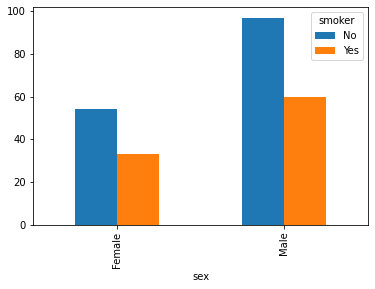

In [ ]:
#diagramme en barres
t4 = pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker)
t4.plot.bar()

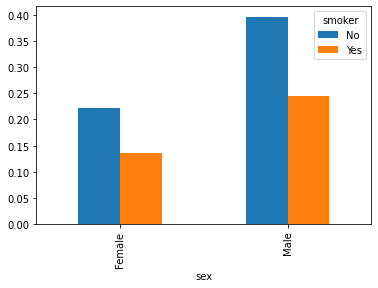

In [ ]:
t4normalize = pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize=True)
t4normalize.plot.bar()

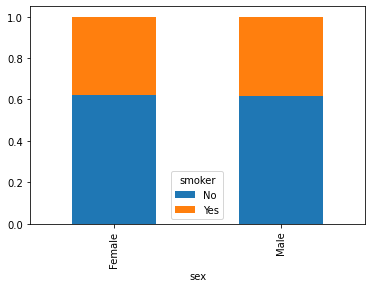

In [ ]:
t5 = pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker, normalize="index")
#barres empilées
t5.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3348e0f98>,
      dtype=object)

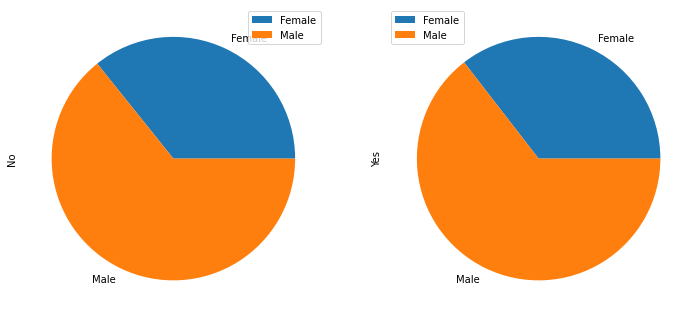

In [ ]:
#diagramme circulaire
t6 = pandas.crosstab(tipsrestaurant.sex, tipsrestaurant.smoker)
t6.plot.pie(subplots=True, figsize = (12, 6))

In [40]:
#tableau croisé simple jour-fumeur avec les sous-totaux en nombre
pandas.crosstab(tipsrestaurant.day, tipsrestaurant.smoker, margins=True)

smoker,No,Yes,All
day,,,
Fri,4,15,19
Sat,45,42,87
Sun,57,19,76
Thur,45,17,62
All,151,93,244


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f74dc59ee80>,
      dtype=object)

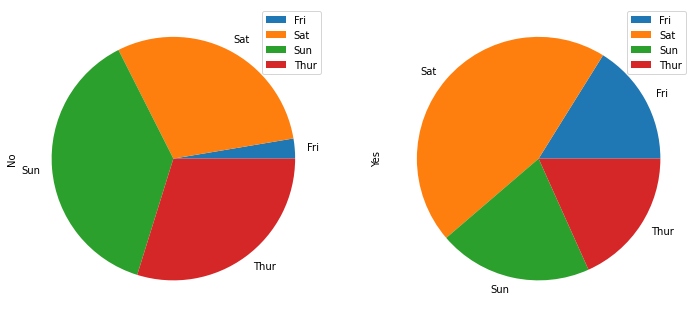

In [41]:
#diagramme circulaire jour-fumeur
t6 = pandas.crosstab(tipsrestaurant.day, tipsrestaurant.smoker)
t6.plot.pie(subplots=True, figsize = (12, 6))

In [ ]:
#qualitative-quantitative
#grouper par sexe et total_bill et agrégger moyenne, std, median, min et max
tipsrestaurant.groupby("sex")["total_bill"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3346e7dd8>,
      dtype=object)

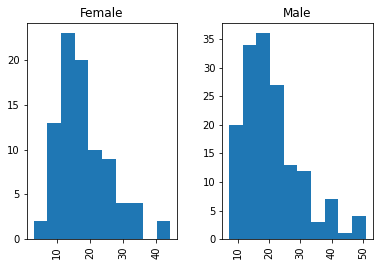

In [ ]:
#histogramme total_bill selon le sexe
tipsrestaurant.hist(column = "total_bill", by = "sex")

In [ ]:
 boite à moustache total_bill selon le sexe

tips.boxplot(column = "total_bill", by = "sex") 

In [ ]:
#fin projet